**KNN**

According to this algorithm, which is used in classification, feature extraction during classification is used to look at the closeness of the new individual to be categorized to k of the previous individuals.
For example, you want to classify a new element for k = 3. in this case the nearest 3 of the old classified elements are taken. If these elements are included in the class, the new element is also included in that class. The euclide distance can be used in the distance calculation.

# Project - Classify Type of Patient from the biomechanical features of orthopedic patients.

# Install the necessary libraries


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline 

# import data 2C_weka.csv for 2 Class Classifcation.


In [2]:
df = pd.read_csv("2Classdata.csv")


,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


# Explore the data set.Get necessary information about the data.

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

In [3]:
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [4]:
df.tail()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [7]:
df.groupby(df['class']).count()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
class,,,,,,
Abnormal,210,210,210,210,210,210
Normal,100,100,100,100,100,100


In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
pelvic_tilt numeric,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
lumbar_lordosis_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
sacral_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
pelvic_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
degree_spondylolisthesis,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


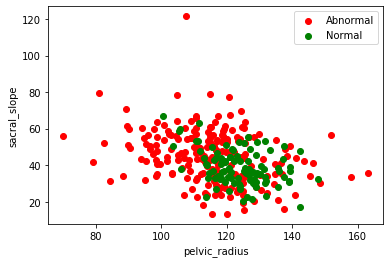

In [20]:
df.rename(columns={'class': 'Type'}, inplace=True)
abnormal = df[df.Type == "Abnormal"]
normal = df[df.Type == "Normal"]
plt.scatter(abnormal.pelvic_radius, abnormal.sacral_slope, color = "red",label = "Abnormal")
plt.scatter(normal.pelvic_radius, normal.sacral_slope, color = "green",label = "Normal")
plt.legend()
plt.xlabel("pelvic_radius")
plt.ylabel("sacral_slope")
plt.show()

# Encode the Class variable to integer.

In [21]:
df['Type'] = df['Type'].replace({'Abnormal': 1, 'Normal': 0})

In [22]:
df

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,Type
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,1
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,1
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,1
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,1
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,1


In [23]:
df.groupby(['Type']).count()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
Type,,,,,,
0,100,100,100,100,100,100
1,210,210,210,210,210,210


# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [25]:
Y = df.Type.values
X = df.drop(['Type'],axis=1)

# Normalize your Data (X) to get values between 0 to 1.

In [27]:
from scipy.stats import zscore
X_z = X.apply(zscore)

In [29]:
X_z.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,0.147086,0.501369,-0.665177,-0.184950,-1.447647,-0.708059
1,-1.245864,-0.748769,-1.453001,-1.041521,-0.264385,-0.579556
2,0.484370,0.467932,-0.099262,0.273083,-0.897686,-0.795421
3,0.511390,0.711562,-0.411339,0.126128,-1.207303,-0.402288
4,-0.626648,-0.789693,-1.274745,-0.215876,-0.733455,-0.490106


# Split the dat as train and test with a ratio of 70:30.

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X_z, Y, test_size=0.3,random_state =10)

In [32]:
print('X_train shape: ', X_train.shape)
print('Y_train shape: ', Y_train.shape)
print('X_test shape: ', X_test.shape)
print('Y_test shape: ', Y_test.shape)

X_train shape:  (217, 6)
Y_train shape:  (217,)
X_test shape:  (93, 6)
Y_test shape:  (93,)


# Build the KNN model using Train Dataset and predict the class on test dataset.

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [35]:
knn = KNeighborsClassifier(n_neighbors = 3) #set K neighbor as 3
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [36]:
predicted_Y = knn.predict(X_test)

# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

In [37]:
print("KNN accuracy according to K=3 is :",knn.score(X_test,Y_test))

KNN accuracy according to K=3 is : 0.8602150537634409


In [0]:
# We assume K = 3 for first iteration, but actually we don't know what is the optimal K value that gives maximum accuracy. 
# So we can write a for loop that iterates for example 25 times and gives the accuracy at each iteartion. 
# So that we can find the optimal K value.

# What is the best K value for your classifcation?
#Find at which k value you get the best score.

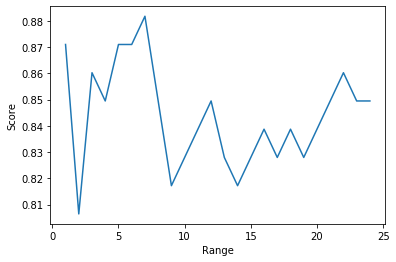

In [38]:
score_array = []
for each in range(1,25):
    knn_loop = KNeighborsClassifier(n_neighbors = each) #set K neighbor as 3
    knn_loop.fit(X_train,Y_train)
    score_array.append(knn_loop.score(X_test,Y_test))
    
plt.plot(range(1,25),score_array)
plt.xlabel("Range")
plt.ylabel("Score")
plt.show()

In [67]:
knn_final = KNeighborsClassifier(n_neighbors = 7) #set K neighbor as 7
knn_final.fit(X_train,Y_train)
predicted_Y = knn_final.predict(X_test)
print("KNN accuracy according to K=7 is :",knn_final.score(X_test,Y_test))

KNN accuracy according to K=7 is : 0.8817204301075269


# import data 3C_weka.csv for 3 Class Classifcation and repeat all the steps which are given above.

In [41]:
df1 = pd.read_csv("3Classdata.csv")
df1.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [43]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt                 310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


In [44]:
df1.corr()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
pelvic_tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


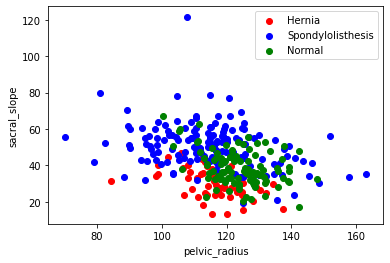

In [46]:
df1.rename(columns={'class': 'Type'}, inplace=True)
hernia = df1[df1.Type == "Hernia"]
spondy = df1[df1.Type == "Spondylolisthesis"]
normal = df1[df1.Type == "Normal"]
plt.scatter(hernia.pelvic_radius, hernia.sacral_slope, color = "red",label = "Hernia")
plt.scatter(spondy.pelvic_radius, spondy.sacral_slope, color = "blue",label = "Spondylolisthesis")
plt.scatter(normal.pelvic_radius, normal.sacral_slope, color = "green",label = "Normal")
plt.legend()
plt.xlabel("pelvic_radius")
plt.ylabel("sacral_slope")
plt.show()

In [47]:
df1['Type'] = df1['Type'].replace({'Normal': 0, 'Hernia': 1,'Spondylolisthesis':2 })

In [48]:
df1

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,Type
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,1
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,1
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,1
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,1
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,1


In [50]:
df1.groupby(['Type']).count()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
Type,,,,,,
0,100,100,100,100,100,100
1,60,60,60,60,60,60
2,150,150,150,150,150,150


In [54]:
y = df1.Type.values
x_ = df1.drop(['Type'],axis=1)
x_

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437


In [55]:
from scipy.stats import zscore
x_z = x_.apply(zscore)
x_z.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,0.147086,0.501369,-0.665177,-0.184950,-1.447647,-0.708059
1,-1.245864,-0.748769,-1.453001,-1.041521,-0.264385,-0.579556
2,0.484370,0.467932,-0.099262,0.273083,-0.897686,-0.795421
3,0.511390,0.711562,-0.411339,0.126128,-1.207303,-0.402288
4,-0.626648,-0.789693,-1.274745,-0.215876,-0.733455,-0.490106


In [57]:
x_train, x_test, y_train, y_test = train_test_split(x_z, y, test_size=0.3,random_state =5)

In [58]:
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', y_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (217, 6)
y_train shape:  (217,)
x_test shape:  (93,)
y_test shape:  (93,)


In [59]:
knn_new = KNeighborsClassifier(n_neighbors = 4) #set K neighbor as 3
knn_new.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [60]:
predicted_y = knn_new.predict(x_test)

In [61]:
print("KNN accuracy according to K=4 is :",knn_new.score(x_test,y_test))

KNN accuracy according to K=4 is : 0.8064516129032258


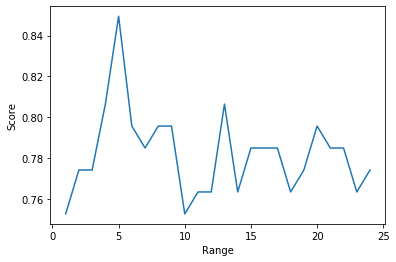

In [73]:
score = []
for each in range(1,25):
    knn_loop_new = KNeighborsClassifier(n_neighbors = each) #set K neighbor as 4
    knn_loop_new.fit(x_train,y_train)
    score.append(knn_loop_new.score(x_test,y_test))
    
plt.plot(range(1,25),score)
plt.xlabel("Range")
plt.ylabel("Score")
plt.show()

In [74]:
knn_3C = KNeighborsClassifier(n_neighbors = 5) #set K neighbor as 5
knn_3C.fit(x_train,y_train)
predicted_y = knn_3C.predict(x_test)
print("KNN accuracy according to K=5 is :",knn_3C.score(x_test,y_test))

KNN accuracy according to K=5 is : 0.8494623655913979
